## Linear Regression Model


### Data load

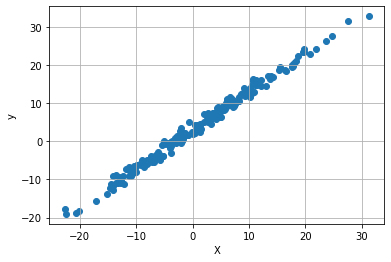

In [1]:
import torch
import matplotlib.pyplot as plt

X = torch.randn(200, 1) * 10
y = X + 3 + torch.randn(200, 1)
plt.scatter(X.numpy(), y.numpy())
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()


### Define model

In [2]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [3]:
model = LR()
print(model)
print(list(model.parameters()))

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.2847]], requires_grad=True), Parameter containing:
tensor([-0.7186], requires_grad=True)]


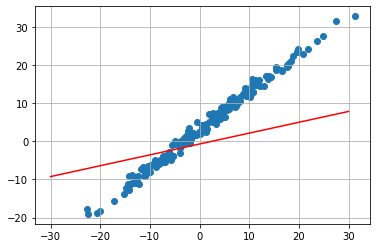

In [4]:
import numpy as np

w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()

x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

# 실제 데이터와 현재 inital weight의 예측
plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

### Loss function & Optimizer

In [5]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### Model Train

In [6]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()

    y_pred = model(X)
    loss = criterion(y_pred, y)
    print(loss)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()

tensor(73.9387, grad_fn=<MseLossBackward>)
tensor(51.7344, grad_fn=<MseLossBackward>)
tensor(37.7911, grad_fn=<MseLossBackward>)
tensor(29.0281, grad_fn=<MseLossBackward>)
tensor(23.5136, grad_fn=<MseLossBackward>)
tensor(20.0362, grad_fn=<MseLossBackward>)
tensor(17.8362, grad_fn=<MseLossBackward>)
tensor(16.4374, grad_fn=<MseLossBackward>)
tensor(15.5410, grad_fn=<MseLossBackward>)
tensor(14.9597, grad_fn=<MseLossBackward>)
tensor(14.5761, grad_fn=<MseLossBackward>)
tensor(14.3166, grad_fn=<MseLossBackward>)
tensor(14.1349, grad_fn=<MseLossBackward>)
tensor(14.0021, grad_fn=<MseLossBackward>)
tensor(13.9000, grad_fn=<MseLossBackward>)
tensor(13.8173, grad_fn=<MseLossBackward>)
tensor(13.7468, grad_fn=<MseLossBackward>)
tensor(13.6840, grad_fn=<MseLossBackward>)
tensor(13.6261, grad_fn=<MseLossBackward>)
tensor(13.5714, grad_fn=<MseLossBackward>)
tensor(13.5188, grad_fn=<MseLossBackward>)
tensor(13.4675, grad_fn=<MseLossBackward>)
tensor(13.4171, grad_fn=<MseLossBackward>)
tensor(13.3

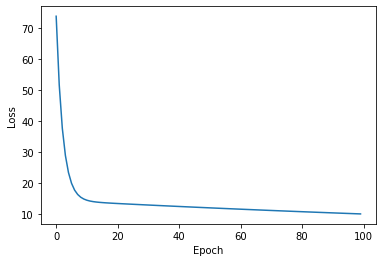

In [8]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

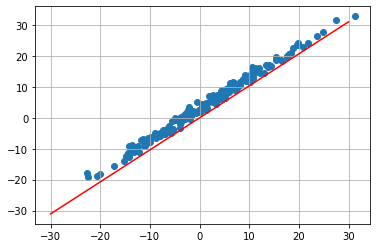

In [9]:
w1, b1 = w[0][0].item(), b[0].item()

x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

# 실제 데이터와 학습 후의 weight의 예측
plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()